In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import huber_tukey

In [25]:
#generate samples
np.random.seed(0)
X = np.arange(0, 10, 0.05)
y = 0.5 * X  + 0.3 +  np.array([0.2*np.random.rand() for _ in range(len(X))])

In [26]:
#サンプルをシャッフル
p = np.random.permutation(len(X))
X = X[p]
y = y[p]

#外れ値を入れる
outliar_index = np.random.randint(len(X), size = 10)
y[outliar_index] = 0.1

train_ratio = 0.8
X_train, y_train, X_test, y_test = X[:len(X)*train_ratio],  y[:len(X)*train_ratio], X[len(X)*train_ratio:],  y[len(X)*train_ratio:]

/Users/nakahara/.pyenv/versions/anaconda2-4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [27]:
eta = 1.0

In [28]:
#huber
reg = huber_tukey.RobustLinearRegressor(X_train, y_train, eta = eta, dim = 1, how = "huber")

In [29]:
reg.fit()

In [30]:
y_huber = reg.predict(X_test)

In [31]:
#tukey
reg = huber_tukey.RobustLinearRegressor(X_train, y_train, eta = eta, dim = 1, how = "tukey")

In [32]:
reg.fit()
y_tukey = reg.predict(X_test)

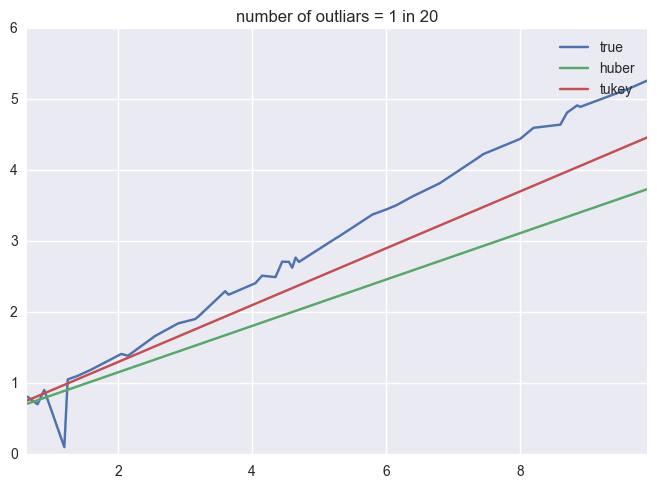

In [33]:
order = np.argsort(X_test)
pd.Series(y_test[order], index = X_test[order]).plot(label = "true")
pd.Series(y_huber[order], index = X_test[order]).plot(label = "huber")
pd.Series(y_tukey[order], index = X_test[order]).plot(label = "tukey")
plt.title("number of outliars = 1 in 20")
plt.legend()

In [39]:
#generate samples
#np.random.seed(0)
X = np.arange(0, 10, 0.05)
y = 0.5 * X  + 0.3 +  np.array([0.2*np.random.rand() for _ in range(len(X))])

#サンプルをシャッフル
p = np.random.permutation(len(X))
X = X[p]
y = y[p]

#外れ値を入れる
outliar_index = np.random.randint(len(X), size = 40)
y[outliar_index] = 0.1

train_ratio = 0.8
X_train, y_train, X_test, y_test = X[:len(X)*train_ratio],  y[:len(X)*train_ratio], X[len(X)*train_ratio:],  y[len(X)*train_ratio:]

/Users/nakahara/.pyenv/versions/anaconda2-4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [40]:
#huber
reg = huber_tukey.RobustLinearRegressor(X_train, y_train, eta = eta, dim = 1, how = "huber").fit()

In [41]:
y_huber = reg.predict(X_test)

In [42]:
#tukey
reg = huber_tukey.RobustLinearRegressor(X_train, y_train, eta = eta, dim = 1, how = "tukey").fit()
y_tukey = reg.predict(X_test)

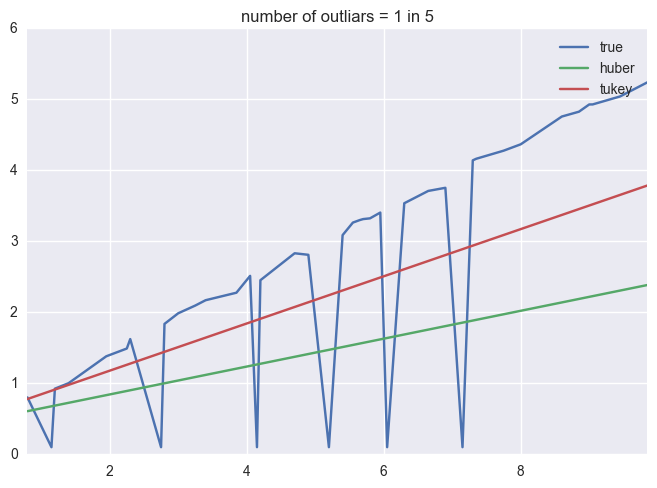

In [43]:
order = np.argsort(X_test)
pd.Series(y_test[order], index = X_test[order]).plot(label = "true")
pd.Series(y_huber[order], index = X_test[order]).plot(label = "huber")
pd.Series(y_tukey[order], index = X_test[order]).plot(label = "tukey")

plt.title("number of outliars = 1 in 5")
plt.legend()